In [ ]:
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lenovo\anaconda3\envs\DL_s7_lab\lib\site-packages

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


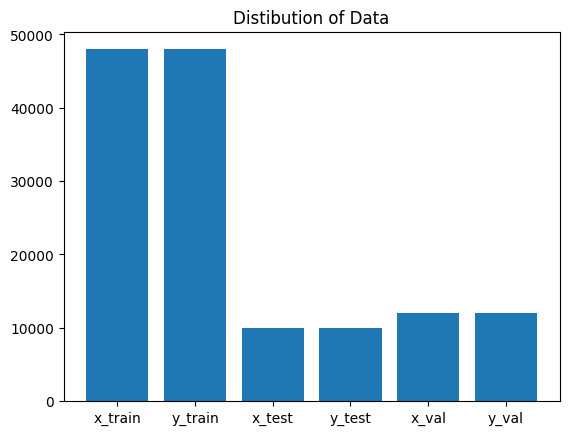

In [ ]:
import matplotlib.pyplot as plt

labels = ['x_train', 'y_train', 'x_test', 'y_test', 'x_val', 'y_val']
values = [len(x_train), len(y_train), len(x_test), len(y_test), len(x_val), len(y_val)]

plt.bar(labels, values)
plt.title('Distibution of Data')
plt.show()

In [ ]:
x_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,  17,  47,  47,  47,  47,
          47,  47,  28

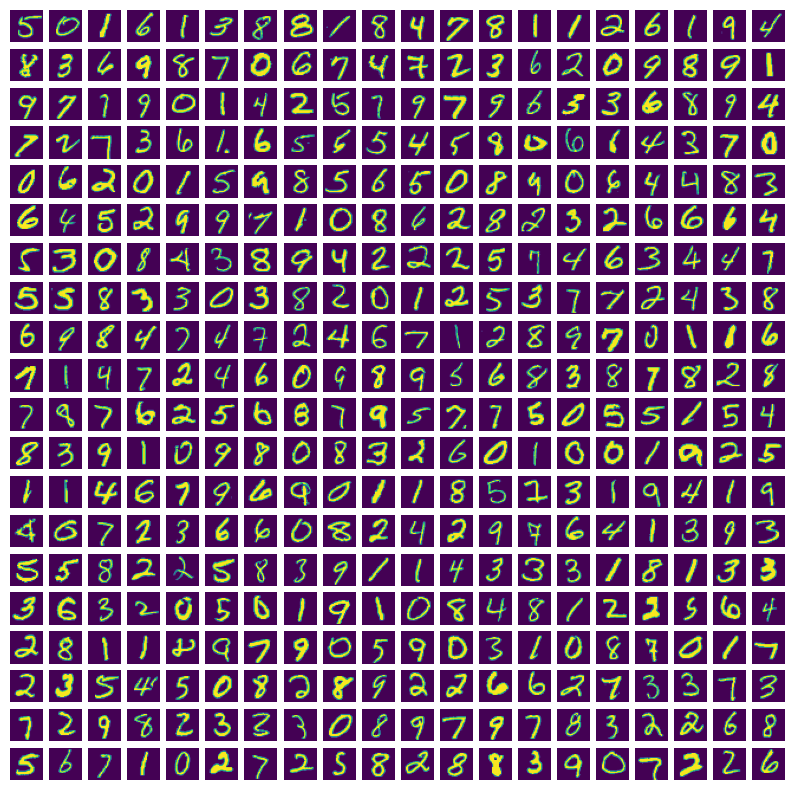

In [ ]:
r,c = 20,20

fig, axs = plt.subplots(r, c, figsize=(10, 10))

k=0
for i in range(r):
    for j in range(c):
        axs[i, j].imshow(x_train[k])
        axs[i, j].axis('off')
        k += 1

plt.show()

In [ ]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [ ]:
x_train[1].shape

(28, 28)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train, y_test, y_val =  to_categorical(y_train), to_categorical(y_test), to_categorical(y_val)

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28, 1)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(rate=0.4),
    layers.Dense(10, activation="softmax")
])



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 51s 1ms/sample - loss: 0.6827 - acc: 0.8627 - val_loss: 0.1006 - val_acc: 0.9722
Epoch 2/5
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.1483 - acc: 0.9572 - val_loss: 0.0647 - val_acc: 0.9820
Epoch 3/5
48000/48000 [==============================] - 54s 1ms/sample - loss: 0.1005 - acc: 0.9716 - val_loss: 0.0629 - val_acc: 0.9838
Epoch 4/5
48000/48000 [==============================] - 56s 1ms/sample - loss: 0.0809 - acc: 0.9761 - val_loss: 0.0518 - val_acc: 0.9869
Epoch 5/5
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.0675 - acc: 0.9804 - val_loss: 0.0558 - val_acc: 0.9840


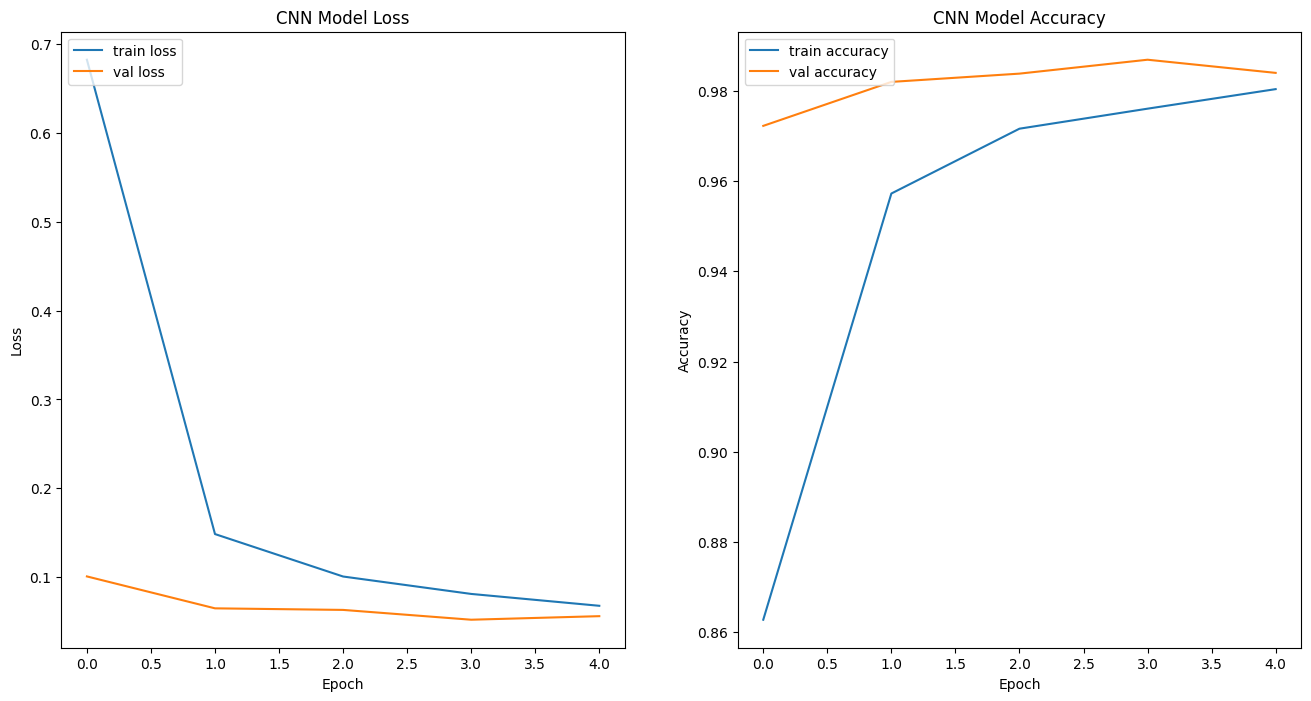

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('CNN Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper left')

ax[1].plot(history.history['acc'], label='train accuracy')
ax[1].plot(history.history['val_acc'], label='val accuracy')
ax[1].set_title('CNN Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper left')

plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print("Testing Loss:\t\t", loss)
print("Testing Accuracy:\t", acc*100)

10000/10000 [==============================] - 5s 452us/sample - loss: 0.0474 - acc: 0.9854
Testing Loss:		 0.047446449109872446
Testing Accuracy:	 98.54000210762024


In [ ]:
def output_plot(image):

    class_labels = [str(i) for i in range(0,10)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))

    predictions = model.predict(image.reshape(1, 28, 28, 1))

    axs[0].imshow(image)
    axs[0].axis('off')
    prediction_values = predictions[0]

    max_index = np.argmax(prediction_values)
    colors = ['green' if i == max_index else 'blue' for i in range(len(class_labels))]

    axs[1].barh(class_labels, prediction_values, color=colors)
    axs[1].set_xlim([0, 1])

    plt.tight_layout()
    plt.show()


(28, 28, 1)


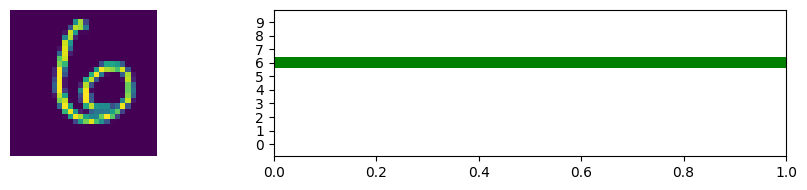

(28, 28, 1)


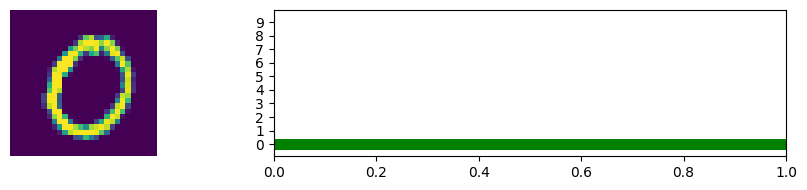

(28, 28, 1)


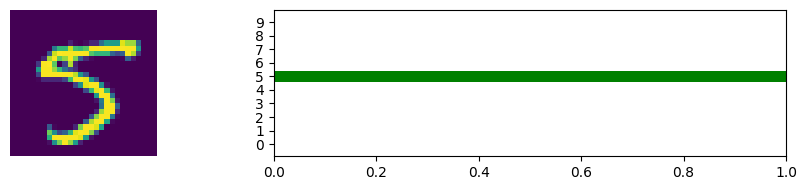

(28, 28, 1)


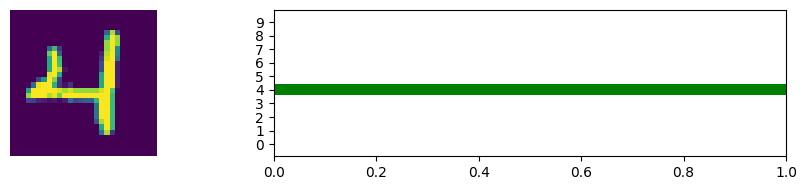

(28, 28, 1)


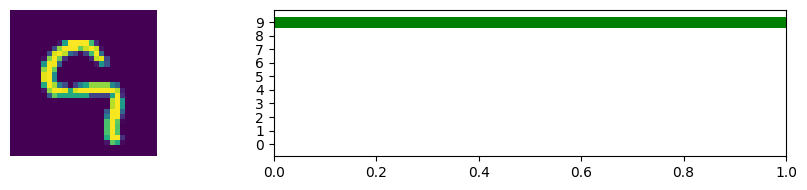

In [ ]:
for i in x_test[100:105]:
    print(i.shape)
    output_plot(i)